In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('E:\Videos\My courses\data sets\Students.csv')
df.rename(columns={'EthnicGroup':'Groups'},inplace=True)
df.head()

STD_ID  Gender   Groups          ParentEduc     LunchType   TestPrep  \
0       1  female  group B     master's degree      standard       none   
1       2    male  group C        some college      standard       none   
2       3  female  group B  associate's degree      standard       none   
3       4  female  group B        some college      standard  completed   
4       5    male  group B        some college  free/reduced       none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0              single     sometimes          yes           4     school_bus   
1             married     sometimes          yes           0     school_bus   
2             married     regularly          yes           1     school_bus   
3             widowed         never           no           1        private   
4             married     sometimes          yes           1        private   

   MathScore  ReadingScore  WritingScore  
0         87            93            91  
1         76            78            75  
2         73            84            79  
3         85            93            89  
4         41            43            39

In [3]:
df.shape

(19243, 14)

In [4]:
df.describe()

STD_ID    NrSiblings     MathScore  ReadingScore  WritingScore
count  19243.000000  19243.000000  19243.000000  19243.000000  19243.000000
mean    9622.000000      2.147482     66.635504     69.534324     68.602869
std     5555.119951      1.443735     15.362362     14.785547     15.481824
min        1.000000      0.000000      0.000000     10.000000      4.000000
25%     4811.500000      1.000000     56.000000     59.000000     58.000000
50%     9622.000000      2.000000     67.000000     70.000000     69.000000
75%    14432.500000      3.000000     78.000000     80.000000     80.000000
max    19243.000000      7.000000    100.000000    100.000000    100.000000

In [5]:
df[df.columns[1:9]].describe()

Gender   Groups    ParentEduc LunchType TestPrep ParentMaritalStatus  \
count    19243    19243         19243     19243    19243               19243   
unique       2        5             6         2        2                   4   
top     female  group C  some college  standard     none             married   
freq      9775     6181          4425     12472    12587               11009   

       PracticeSport IsFirstChild  
count          19243        19243  
unique             3            2  
top        sometimes          yes  
freq            9715        12417

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19243 entries, 0 to 19242
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STD_ID               19243 non-null  int64 
 1   Gender               19243 non-null  object
 2   Groups               19243 non-null  object
 3   ParentEduc           19243 non-null  object
 4   LunchType            19243 non-null  object
 5   TestPrep             19243 non-null  object
 6   ParentMaritalStatus  19243 non-null  object
 7   PracticeSport        19243 non-null  object
 8   IsFirstChild         19243 non-null  object
 9   NrSiblings           19243 non-null  int64 
 10  TransportMeans       19243 non-null  object
 11  MathScore            19243 non-null  int64 
 12  ReadingScore         19243 non-null  int64 
 13  WritingScore         19243 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


In [7]:
df.columns

Index(['STD_ID', 'Gender', 'Groups', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

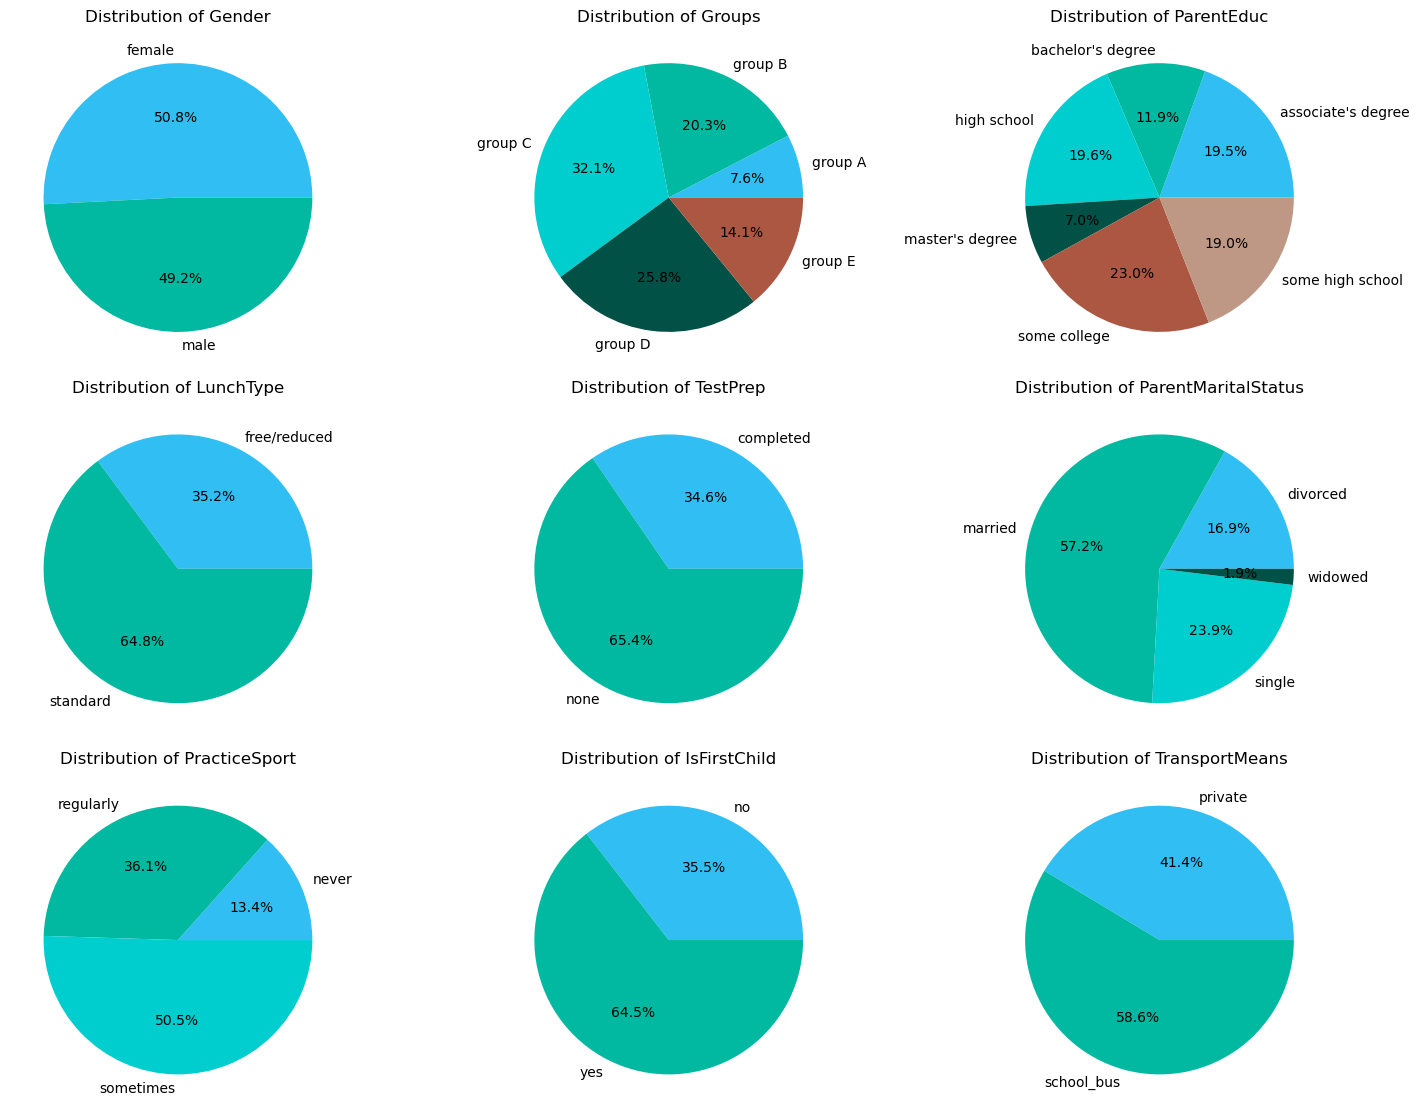

In [8]:
color_dict = {'female': 'F331B9', 'male': '31BFF3','single': '00B9A0', 'married': '00CDCD','divorced':'015146',
              'widowed':'7CB7CD','school_bus':'EFCEA3', 'private':'FD9307','none':'A93002','completed':'AB5742','yes':'BE4886','no':'BE9885'}
df_col=['Gender', 'Groups', 'ParentEduc', 'LunchType', 'TestPrep','ParentMaritalStatus', 'PracticeSport',
        'IsFirstChild','TransportMeans']
plt.figure(figsize=(15,15),dpi=100)
for e,i in enumerate(df_col):
    g=df.groupby(i).count().reset_index()
    plt.subplot(4,3,e+1)
    plt.pie(g['STD_ID'],labels=g[i],autopct='%1.1f%%',colors=['#31BFF3','#00B9A0','#00CDCD','#015146','#AB5742','#BE9885'])
    plt.title(f'Distribution of {i}')
    plt.tight_layout()

In [9]:
g=df.groupby(by="Groups").count().reset_index() 
plt.figure(figsize=(12,6))
sns.barplot(data=g,x='Groups',y='STD_ID',palette='plasma')
plt.title(' The number of students in each group')
plt.show()

In [10]:
from plotly.subplots import make_subplots
g1=df.groupby(by="Groups").mean()
g1=g1.reset_index() 

x1=g.Groups
y=g1.MathScore
y1=g1.ReadingScore
y2=g1.WritingScore

fig = make_subplots(rows=1, cols=1)

trace1 = go.Bar( x=x1, y=y, name='Math score',marker={'color':'purple'})

trace2 = go.Bar( x=x1, y=y1, name='Reading score', marker= {"color":'violet'})

trace3 = go.Bar(x=x1,y=y2,name='Writing score' ,marker = {'color':'Darkviolet'})
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=1)
fig.add_trace(trace3, row=1, col=1)

fig.update_yaxes(title_text='Avarage Score', row=1, col=1)
fig.update_xaxes(title_text='Groups', row=1, col=1)


fig.update_layout(title='Average score of the students in each group',barmode='group',height=650,width=900,showlegend=True,)
fig.show()

In [11]:
ga=df.groupby(df['ParentEduc']).mean().reset_index()
p=ga.ParentEduc
y=ga.MathScore
y1=ga.ReadingScore
y2=ga.WritingScore

fig , ax =plt.subplots(3,1,figsize=(13,20))
M=sns.barplot(x=p,y=y,ax=ax[0],palette='Greens',ec='black')
M.set_title('Average Masth Score of the students by parent education',size=15)
M.tick_params(axis='x', rotation=30)
for s in M.containers:
    M.bar_label(s,fmt='%.0f')

R=sns.barplot(x=p,y=y1,ax=ax[1],palette='Greens',ec='black')
R.set_title('Average Reading Score of the students by parent education',size=15)
R.tick_params(axis='x', rotation=30)

for s in R.containers:
    R.bar_label(s,fmt='%.0f')

W=sns.barplot(x=p,y=y2,ax=ax[2],palette='Greens',ec='black')
W.set_title('Average Writing Score of the students by parent education',size=15)
W.tick_params(axis='x', rotation=30)

for s in W.containers:
    W.bar_label(s,fmt='%.0f')

plt.tight_layout();

In [12]:
group=df.groupby(by='Gender').mean().reset_index()

sax=group.Gender
y=group.MathScore
y1=group.ReadingScore
y2=group.WritingScore

fig=make_subplots(rows=1,cols=1)
tr=go.Bar(x=sax,y=y,name='Math Score',marker={'color':'lightyellow'})
tr1=go.Bar(x=sax,y=y1,name ='Reading Score',marker={'color':'lightblue'})
tr2=go.Bar(x=sax,y=y2,name='Writing Score',marker={'color':'purple'})

fig.add_trace(tr,row=1 , col=1)
fig.add_trace(tr1,row=1, col=1)
fig.add_trace(tr2,row=1, col=1)

fig.update_layout(title='Avarage exams score ' ,barmode='group',showlegend=True,height=750,width=1000)
fig.show()

In [13]:
for e,i in enumerate(df.columns[11::]):
    fig=px.box(data_frame=df,x=i)
    fig.update_layout(title=i,width=1000,height=650)
    fig.show()

In [14]:
plt.figure(figsize=(15,6))
for e,i in enumerate(df.columns[11::]):
    plt.subplot(1,3,e+1)
    sns.histplot(df[i],kde=True,multiple="layer")
    plt.title('Distribution of ' + i)
    plt.tight_layout()